<a href="https://colab.research.google.com/github/Vite-Noiz/Machine-Learning-Course/blob/main/Bayesian/sample_NBFixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Bayesian Classification



Bayes's Theorem:

$$
P(A~|~{\rm B}) = \frac{P({\rm B}~|~A)P(A)}{P({\rm B})}
$$

Naive Bayes classifiers are built on Bayesian classification methods.
These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.
In Bayesian classification, we're interested in finding the probability of a label $y$ given some observed features(X), which we can write as $P(y~|~{\rm X})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(y~|~{\rm X}) = \frac{P({\rm X}~|~y)P(y)}{P({\rm X})}
$$

$$
P(y~|~{\rm X}) = \frac{P({\rm x_{1}}~|~y)P({\rm x_{2}}~|~y)P({\rm x_{3}}~|~y)...P({\rm x_{n}}~|~y)P(y)}{P({\rm X})}
$$

-->
$$
y = argmax_{y}P(y~|~{\rm X}) = argmax_{y}\frac{P({\rm x_{1}}~|~y)P({\rm x_{2}}~|~y)P({\rm x_{3}}~|~y)...P({\rm x_{n}}~|~y)P(y)}{P({\rm X})}
$$

-->
$$
y = argmax_{y}P({\rm x_{1}}~|~y)P({\rm x_{2}}~|~y)P({\rm x_{3}}~|~y)...P({\rm x_{n}}~|~y)P(y)
$$
-->
$$
y = argmax_{y}log(P({\rm x_{1}}~|~y))+log(P({\rm x_{2}}~|~y))+log(P({\rm x_{3}}~|~y))+...+log(P({\rm x_{n}}~|~y))+log(P(y))
$$

 P(y) : Prior probability --> Frequency of each class

P(x_i|y) : Class conditional probability --> Model with Gaussian


In [25]:
!gdown 1EAR1TxPzRA2riGqDhhunthpk8bYYlj8K

Downloading...
From: https://drive.google.com/uc?id=1EAR1TxPzRA2riGqDhhunthpk8bYYlj8K
To: /content/iris.csv
100% 3.87k/3.87k [00:00<00:00, 12.2MB/s]


In [26]:
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Preparation & Visualization

In [27]:
data = pd.read_csv('iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [29]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
data.groupby('variety').size()

,0
variety,
Setosa,50
Versicolor,50
Virginica,50


<Axes: xlabel='variety', ylabel='count'>

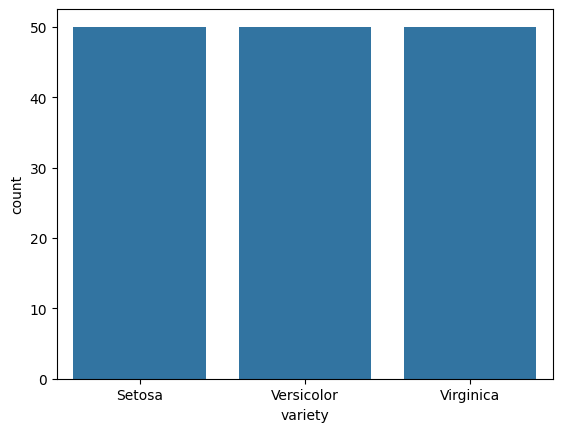

In [31]:
sns.countplot(x='variety', data=data)

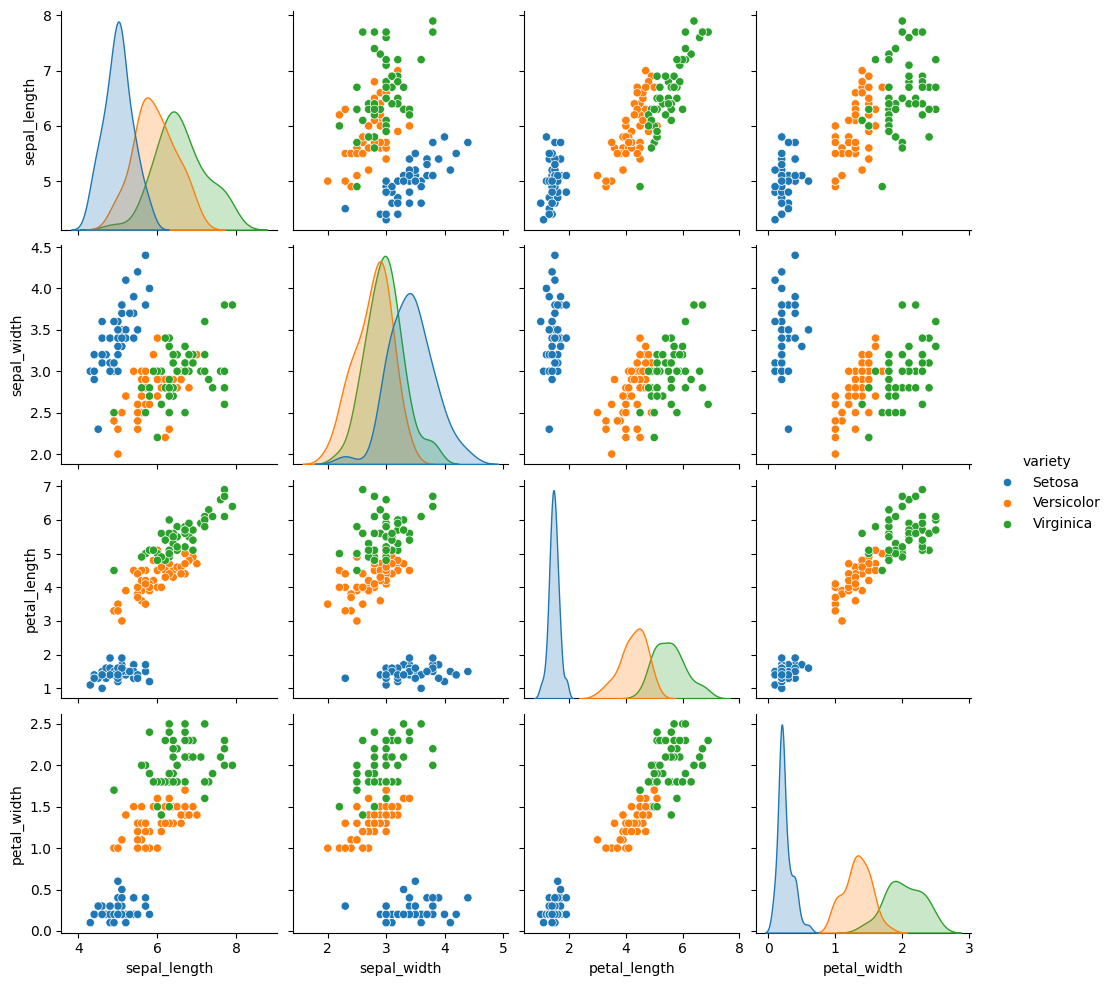

In [32]:
sns.pairplot(data,hue='variety')

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

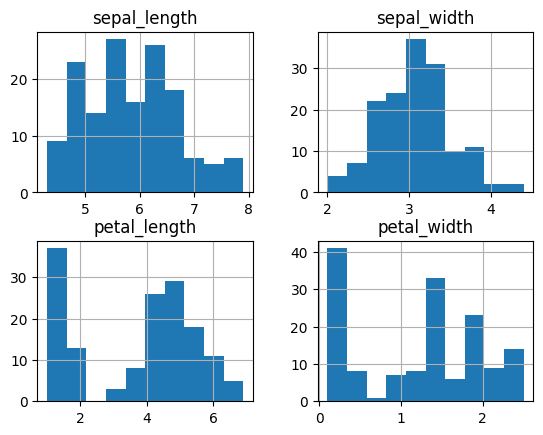

In [33]:
data.hist()

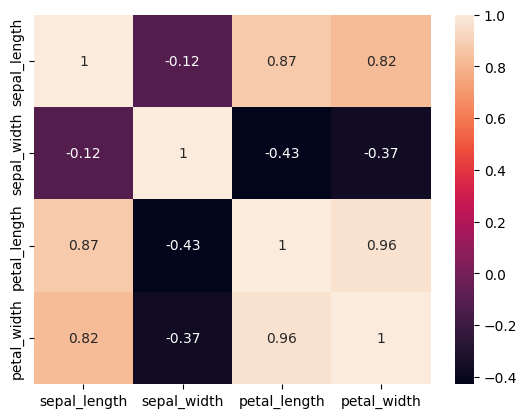

In [34]:
cor=data.iloc[:,:-1].corr()
fig, ax = plt.subplots()
ax = sns.heatmap(cor, annot=True)

### Spliting Data

In [35]:
X=np.array(data.loc[:,data.columns!='variety'])
y=np.array(data.loc[:,data.columns=='variety'])

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print('train:',X_train.shape, y_train.shape,'\ntest: ', X_test.shape, y_test.shape)

train: (120, 4) (120, 1) 
test:  (30, 4) (30, 1)


### StandardScaler


standardizes features by removing the mean and scaling to unit variance. This standardization is a common requirement for many machine learning estimators, as they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g., Gaussian with 0 mean and unit variance).

The scaling operation follows this formula:
$$
z = \frac{(x - u)}{s}
$$
where:
- $ x $ is the feature value.
- $ u $ is the mean of the training samples.
- $ s $ is the standard deviation of the training samples.

**Benefits of StandardScaler**

1. **Normalization:** StandardScaler normalizes the features, meaning that each feature will have a mean of 0 and a standard deviation of 1, leading to a Gaussian distribution.
2. **Improved Performance:** Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale and close to normally distributed.
3. **Compatibility:** StandardScaler is compatible with sparse and dense data formats and can be seamlessly integrated into the preprocessing pipeline.

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
print(X_train[:5])
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train[:5])

[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]
[[ 0.61303014  0.10850105  0.94751783  0.736072  ]
 [-0.56776627 -0.12400121  0.38491447  0.34752959]
 [-0.80392556  1.03851009 -1.30289562 -1.33615415]
 [ 0.25879121 -0.12400121  0.60995581  0.736072  ]
 [ 0.61303014 -0.58900572  1.00377816  1.25412853]]


In [38]:
print(y_train.shape)
print(y_train.ravel().shape)

(120, 1)
(120,)


## NaiveBayes Classifier

In [39]:
class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)


    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        # return class with the highest posterior
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


In [40]:
from sklearn.naive_bayes import GaussianNB
MyNB = NaiveBayes()
SKNB=GaussianNB()

MyNB.fit(X_train, y_train.ravel())
SKNB.fit(X_train,y_train.ravel())
pred = MyNB.predict(X_test)
pred2 = SKNB.predict(X_test)

In [41]:
print(pred)
print(pred2)


['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor' 'Versicolor'
 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Setosa' 'Setosa' 'Virginica'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Setosa']
['Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa' 'Virginica'
 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor' 'Versicolor'
 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Setosa' 'Setosa' 'Virginica'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Setosa']


## Evaluation

https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       0.93      1.00      0.96        13
   Virginica       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



### ConfusionMatrix

The confusion matrix itself is a simple layout that shows the counts of predictions divided into four categories:
- **True Positive (TP):** The number of correct predictions that an instance is positive.
- **True Negative (TN):** The number of correct predictions that an instance is negative.
- **False Positive (FP):** The number of incorrect predictions that an instance is positive, also known as Type I error.
- **False Negative (FN):** The number of incorrect predictions that an instance is negative, also known as Type II error.

This matrix provides a straightforward way to measure the performance of a classification model, allowing for the calculation of metrics like accuracy, precision, recall, and F1 score.

### Calculating Metrics from the Confusion Matrix

- **Accuracy:** Overall, how often the classifier is correct.
  
  $Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $

- **Precision:** When it predicts positive, how often is it correct?

  $Precision = \frac{TP}{TP + FP}$

- **Recall (Sensitivity or True Positive Rate):** How often it predicts positive when it's actually positive.

  $Recall = \frac{TP}{TP + FN}$

- **F1 Score:** A weighted average of Precision and Recall.

  $F1 Score = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$



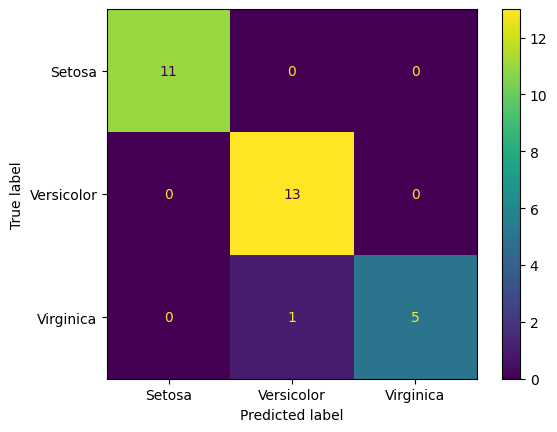

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,pred)
names = list(data.groupby('variety').groups.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names)
disp.plot()
plt.show()

In [44]:
print('true label:',y_test.ravel()[6:12])
print('pred label:',pred[6:12])


true label: ['Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Virginica' 'Versicolor']
pred label: ['Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor']


In [45]:
29/(30+30-29)

0.9354838709677419

**Jaccard Score**

The Jaccard score, also known as the Jaccard index or Jaccard similarity coefficient, measures the similarity and diversity of sample sets. It is defined as the size of the intersection divided by the size of the union of the sample sets:
$$
Jaccard Score = \frac{|A \cap B|}{|A \cup B|}
$$
where \( A \) and \( B \) are sets of predicted and actual labels, respectively. The Jaccard score ranges from 0 to 1, where 1 means that the two sets perfectly match.

In the context of classification:
- **0 indicates no similarity** (i.e., there are no common elements between the predicted and actual labels).
- **1 indicates perfect similarity** (i.e., the predicted labels perfectly match the actual labels).


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html#sklearn.metrics.jaccard_score

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score

print('Accuracy :',accuracy_score(y_test,pred))
print('Precision :',precision_score(y_test,pred,average='micro'))
print('Recall :',recall_score(y_test,pred,average='micro'))
print('F1 score :',f1_score(y_test,pred,average='micro'))
print('Jaccard score :',jaccard_score(y_test,pred,average='micro'))


Accuracy : 0.9666666666666667
Precision : 0.9666666666666667
Recall : 0.9666666666666667
F1 score : 0.9666666666666667
Jaccard score : 0.9354838709677419


## When to Use Naive Bayes



Because naive Bayes classifiers make such stringent assumptions about data, they will generally not perform as well as more complicated models.
That said, they have several advantages:

- They are fast for both training and prediction.
- They provide straightforward probabilistic prediction.
- They are often easily interpretable.
- They have few (if any) tunable parameters.

These advantages mean a naive Bayes classifier is often a good choice as an initial baseline classification.
If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem.
If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in the following situations:

- When the naive assumptions actually match the data (very rare in practice)
- For very well-separated categories, when model complexity is less important
- For very high-dimensional data, when model complexity is less important

The last two points seem distinct, but they actually are related: as the dimensionality of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in *every single dimension* to be close overall).
This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information.
For this reason, simplistic classifiers like the ones discussed here tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.

<h4>Author:  <a href="https://www.linkedin.com/in/arman-forouzesh-40a68a205/">Arman Forouzesh</a></h4>


<hr>